In [1]:

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


In [2]:
#reading data from file
data = pd.read_csv("input/train.csv")
del data['Unnamed: 0']

In [3]:
rows,cols=data.shape
print("Number of rows = {}".format(rows))
print("Number of cols = {}".format(cols))

Number of rows = 150000
Number of cols = 11


In [4]:
#description of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [5]:
#checking number of missing values columns
print(data['MonthlyIncome'].isnull().value_counts())
print(data['NumberOfDependents'].isnull().value_counts())

False    120269
True      29731
Name: MonthlyIncome, dtype: int64
False    146076
True       3924
Name: NumberOfDependents, dtype: int64


In [6]:
#We can replace the nulls with -1
data = data.fillna(-1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [8]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,5.347941e+03,8.452760,0.265973,1.018240,0.240387,0.711253
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.315214e+04,5.145951,4.169304,1.129771,4.155179,1.135585
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,1.550000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,4.357500e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


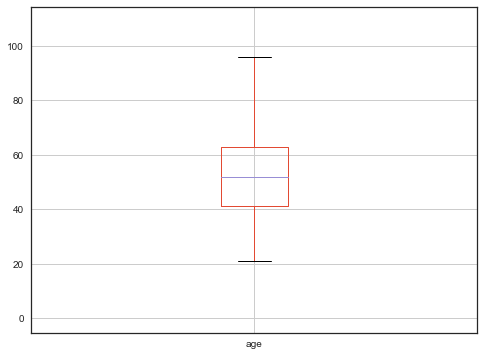

In [9]:
#boxplot of age
df=pd.DataFrame(data['age'])
df.boxplot()

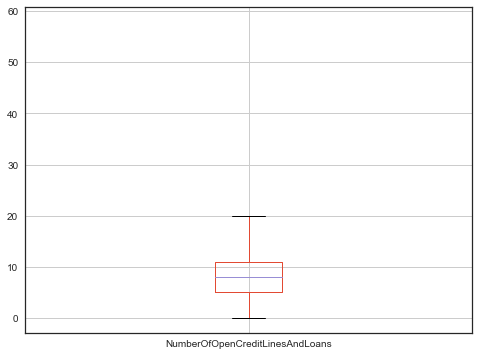

In [10]:
#boxplot of NumberOfOpenCreditLinesAndLoans
df=pd.DataFrame(data['NumberOfOpenCreditLinesAndLoans'])
df.boxplot()

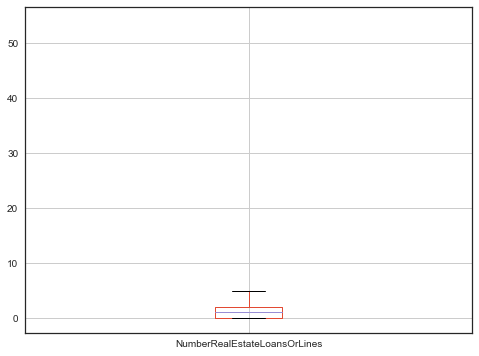

In [11]:
#boxplot of NumberRealEstateLoansOrLines
df=pd.DataFrame(data['NumberRealEstateLoansOrLines'])
df.boxplot()

In [12]:
#mean income according to age
for i in range(2,10):
    print(np.mean(data[(data['age'] >= i*10) & (data['age'] <i*10+10)]['MonthlyIncome']))

2499.822222222222
4776.414959237372
6113.232975535969
6278.739469136852
5583.251997924234
4139.237114918021
3472.2208780487804
3137.9821958456973


In [13]:
#imputing missing income values with means
for i in range(2,10):
    mean=np.mean(data[(data['age'] >= i*10) & (data['age'] <i*10+10)]['MonthlyIncome'])
    data.loc[((data['age'] >= i*10) & (data['age'] <i*10+10) & (data['MonthlyIncome']==-1)),'MonthlyIncome']=mean

In [14]:
for i in range(2,10):
    print(np.mean(data[(data['age'] >= i*10) & (data['age'] <i*10+10)]['MonthlyIncome']))

2908.686807760082
5419.984252154472
7050.1902235549005
7488.222165113692
6973.277707145364
5302.37556180485
4668.364263367025
4586.384959804205


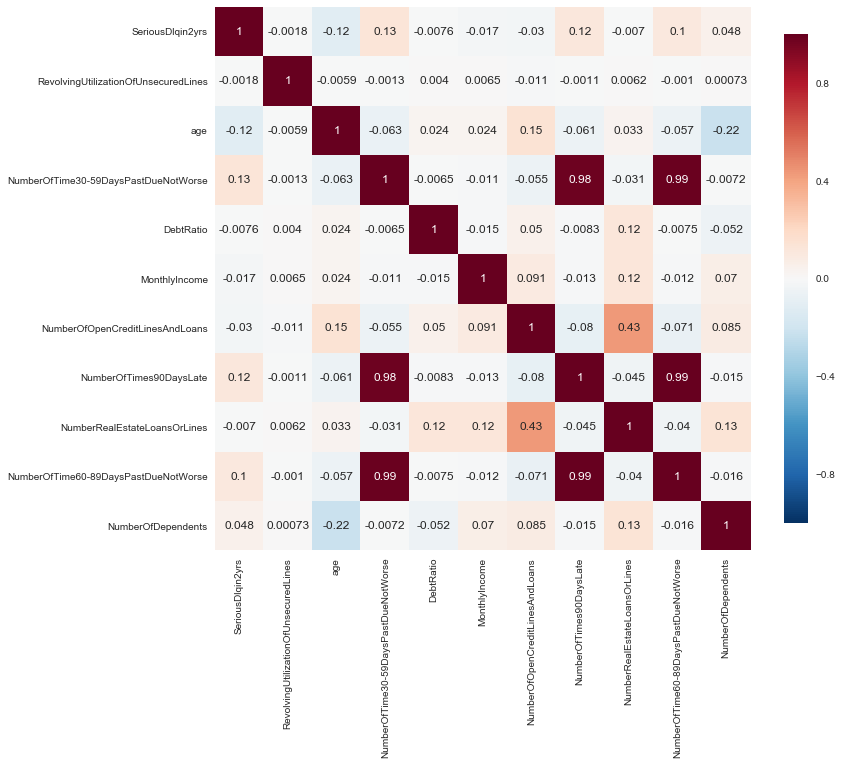

In [15]:
# calculate the correlation matrix
corr = data.corr()
#plot 
import seaborn as sns
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_=sns.heatmap(corr,annot=True,cbar_kws={ 'shrink' : .9 },annot_kws = { 'fontsize' : 12 })

In [16]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.391519e+03,8.452760,0.265973,1.018240,0.240387,0.711253
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.290179e+04,5.145951,4.169304,1.129771,4.155179,1.135585
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.635000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.583252e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [17]:

df=data

In [18]:
#removing outliers from columns
# 1 MonthlyIncome
df=df[np.abs(df.MonthlyIncome-df.MonthlyIncome.mean())<=(3*df.MonthlyIncome.std())] #keep only the ones that are within +3 to -3 standard deviations in the column

In [19]:
#removing outliers from columns
# 2 Revolving credit
df=df[np.abs(df.RevolvingUtilizationOfUnsecuredLines-df.RevolvingUtilizationOfUnsecuredLines.mean())<=(3*df.RevolvingUtilizationOfUnsecuredLines.std())] #keep only the ones that are within +3 to -3 standard deviations in the column

In [20]:
#removing outliers from columns
# 3 Debt Ration
df=df[np.abs(df.DebtRatio-df.DebtRatio.mean())<=(3*df.DebtRatio.std())] #keep only the ones that are within +3 to -3 standard deviations in the column

In [22]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,148800.000000,148800.000000,148800.000000,148800.000000,148800.000000,148800.000000,148800.000000,148800.000000,148800.000000,148800.000000,148800.000000
mean,0.066828,0.421603,52.283118,0.421935,299.928161,6131.811253,8.427870,0.267776,1.004308,0.241935,0.711163
std,0.249725,7.069809,14.793324,4.209049,875.516966,4112.491694,5.126637,4.185962,1.094461,4.171804,1.135055
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.029752,41.000000,0.000000,0.175230,3601.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153329,52.000000,0.000000,0.365505,5583.251998,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556594,63.000000,0.000000,0.848781,7373.250000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,747.000000,109.000000,98.000000,6467.000000,45000.000000,58.000000,98.000000,54.000000,98.000000,20.000000


In [25]:
writer = pd.ExcelWriter('Transformed_data/transformed_data_1.xlsx')

In [24]:
df.to_excel(writer,'Sheet1')